In [82]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (500, 300)
from rdkit.Chem import Draw
from kartograf import SmallMoleculeComponent
from kartograf.atom_aligner import align_mol_shape, align_mol_skeletons
from kartograf import KartografAtomMapper
from kartograf.atom_mapping_scorer import MappingRMSDScorer, MappingShapeOverlapScorer
from kartograf.utils.mapping_visualization_widget import display_mappings_3d

In [83]:
df = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/2_test_set_rxnmapper.pkl.gz')
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_product_smiles,1_product_mapped_smarts,1_r_previous_product,1_prod_to_r1,1_prod_to_r2,2_reaction,...,3_product_mapped_smarts,3_r_previous_product,3_prod_to_r1,3_prod_to_r2,1_r1_smarts,1_r2_smarts,2_r1_smarts,2_r2_smarts,3_r1_smarts,3_r2_smarts
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,None,"{0: 0, 15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,[N:1]#[C:2][CH2:3][C:4](=[O:5])[NH:6][c:7]1[cH...,2,"{0: 0, 4: 1, 3: 2, 2: 3, 1: 4, 5: 5}","{6: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6, ...",O[C:15](=[O:16])[CH:17]1[CH2:18][CH2:19][CH2:2...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,CC(C)(C)OC(=O)[NH:1][c:2]1[cH:3][cH:4][cH:5][c...,None,O[C:4]([CH2:3][C:2]#[N:1])=[O:5],[NH2:6][c:7]1[cH:8][cH:9][cH:10][c:11]([NH:12]...
1,Cn1ncc(NC(=O)CC#N)c1NC(=O)C1CCCO1,Amidation,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1N,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,None,"{0: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5, 21: ...","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: ...",N-Boc_deprotection,...,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,2,"{0: 0, 7: 1, 8: 2, 9: 3, 10: 4, 11: 5}","{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 12: 6, 13...",O[C:16](=[O:17])[CH:18]1[CH2:19][CH2:20][CH2:2...,[CH3:1][n:2]1[n:3][cH:4][c:5]([NH:6][C:7](=[O:...,CC(C)(C)OC(=O)[NH:6][c:5]1[cH:4][n:3][n:2]([CH...,None,O[C:7](=[O:8])[CH2:9][C:10]#[N:11],[CH3:1][n:2]1[n:3][cH:4][c:5]([NH2:6])[c:12]1[...


In [84]:
# get elaborations for the first reaction
to_hippo = pd.read_pickle('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/tests/vectors/BHKVBKDDVLQZCR-UHFFFAOYSA-N_3ADBvA_to_hippo.pkl.gz')
to_hippo

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_num_atom_diff,1_flag,2_reaction,...,3_flag,3_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,intra_geometry_pass
0,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
1,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,A,,-22.720858,383.470848,406.191706,0.553939,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
2,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(N)c1,None,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-1,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
3,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC1(C)CN(c2cccc(N)c2)C(=O)O1,None,CC1(C)CN(c2cccc(NC(=O)C3CCCO3)c2)C(=O)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-2,None,None,N-Boc_deprotection,...,None,B,,-23.505138,385.884760,409.389898,0.632163,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
4,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1ccc(O)c(N)c1,None,CC(C)(C)OC(=O)Nc1ccc(O)c(NC(=O)C2CCCO2)c1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-23,None,None,N-Boc_deprotection,...,None,A,,-50.093752,387.081530,437.175283,0.554922,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13040,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,B,,-39.607626,534.560168,574.167795,0.841773,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13041,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,C,,-15.046741,434.889217,449.935958,0.600600,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13042,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,D,,-7.433983,489.373608,496.807591,0.706762,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True
13043,N#CCC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,CC1CCC(C(=O)O)O1,Cc1ccc(NC(=O)OC(C)(C)C)cc1N,None,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCC(C)O1,BHKVBKDDVLQZCR-UHFFFAOYSA-N-eb2Mvx-132,None,None,N-Boc_deprotection,...,None,A,,-59.881219,480.041054,539.922272,0.655331,"[A71EV2A-x0310_A_147_A71EV2A-x0501+A+152+1, A7...",/data/xchem-fragalysis/kfieseler/A71EV2A_run4/...,True


In [85]:
# set reactant numbers and such
row_num = 0
reaction_step = 1
reactant = 'r1'
random_seed = 100

In [86]:
# get reactant elaborations and reactant smarts
r_elabs = to_hippo[f'{reaction_step}_{reactant}_smiles']
r_elabs = r_elabs.unique()
r_elabs

array(['O=C(O)C1CCCO1', 'O=C1COC(C(=O)O)C1', 'O=C1CCC(C(=O)O)O1',
       'CC1COC(C(=O)O)C1', 'O=C(O)C1OCCC1F', 'O=C(O)C12CC(CO1)C2',
       'CC1(C(=O)O)CCCO1', 'CC1CCC(C(=O)O)O1', 'O=C(O)C1(CO)CCCO1',
       'O=C(O)C1CC(F)(F)CO1', 'CC1(C)CCC(C(=O)O)O1',
       'CC12COC(C(=O)O)(C1)C2', 'CC1CC(C)C(C(=O)O)O1',
       'O=C(O)C12COC(CO1)C2', 'CC1(C)CCOC1C(=O)O', 'CCC1(C(=O)O)CCCO1',
       'O=C(O)C12CC(Cl)(CO1)C2', 'O=C(O)C12CC(Br)(CO1)C2',
       'CC1(C)COC(C(=O)O)C1', 'O=C1OC2(C(=O)O)CC1C2',
       'O=C(O)C1CC2(CC2)CO1', 'CC1OC2(C(=O)O)CC1C2', 'O=C(O)C1OC2CCC1C2',
       'N#CC1(C(=O)O)CCCO1', 'O=C(O)C12CC(F)(CO1)C2',
       'O=C(O)C12CCC(CO1)C2', 'O=C(O)C12CCC(CC1)O2'], dtype=object)

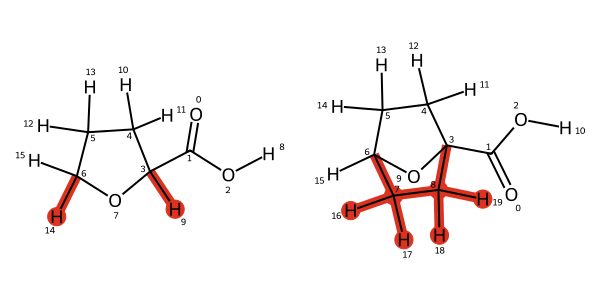

In [87]:
# run kartograf
orig_mol = Chem.AddHs(Chem.MolFromSmiles(df[f'{reaction_step}_{reactant}_smiles'][row_num]), addCoords=True)
elab_mol = Chem.AddHs(Chem.MolFromSmiles(r_elabs[26]), addCoords=True)
# make mapping of first superstructure to original reactant
Chem.rdDistGeom.EmbedMolecule(orig_mol, useRandomCoords=False, randomSeed=random_seed)
orig_smc = SmallMoleculeComponent.from_rdkit(orig_mol)
Chem.rdDistGeom.EmbedMolecule(elab_mol, useRandomCoords=False, randomSeed=random_seed)
elab_smc = SmallMoleculeComponent.from_rdkit(elab_mol)
# Align product to base compound
elab_alignOrig = align_mol_shape(elab_smc, ref_mol=orig_smc)
# Get mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=0.95)
kartograf_mapping = next(mapper.suggest_mappings(orig_smc, elab_alignOrig))
kartograf_mapping

In [88]:
display_mappings_3d(kartograf_mapping)

[16:41:31] UFFTYPER: Unrecognized atom type: O_5 (0)
[16:41:31] UFFTYPER: Unrecognized atom type: C_5 (1)
[16:41:31] UFFTYPER: Unrecognized hybridization for atom: 3
[16:41:31] UFFTYPER: Unrecognized atom type: C_ (3)
[16:41:31] UFFTYPER: Unrecognized atom type: C_6 (4)
[16:41:31] UFFTYPER: Unrecognized atom type: C_6 (5)
[16:41:31] UFFTYPER: Unrecognized atom type: C_6 (6)
[16:41:31] UFFTYPER: Unrecognized atom type: O_6 (7)


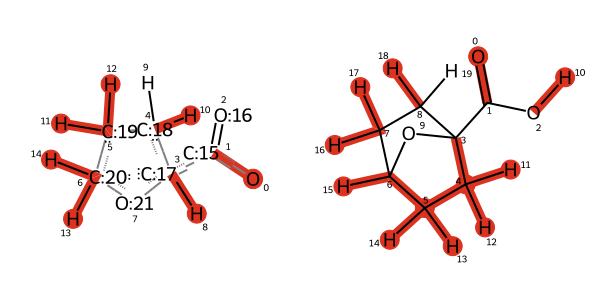

In [89]:
# run kartograf with SMARTS mol
# run kartograf
orig_mol_noh = Chem.MolFromSmarts(df[f'{reaction_step}_{reactant}_smarts'][row_num])
Chem.SanitizeMol(orig_mol_noh)
orig_mol = Chem.AddHs(orig_mol_noh, addCoords=True)
elab_mol = Chem.AddHs(Chem.MolFromSmiles(r_elabs[26]), addCoords=True)
# make mapping of first superstructure to original reactant
Chem.rdDistGeom.EmbedMolecule(orig_mol, useRandomCoords=False, randomSeed=random_seed)
orig_smc = SmallMoleculeComponent.from_rdkit(orig_mol)
Chem.rdDistGeom.EmbedMolecule(elab_mol, useRandomCoords=False, randomSeed=random_seed)
elab_smc = SmallMoleculeComponent.from_rdkit(elab_mol)
# Align product to base compound
elab_alignOrig = align_mol_shape(elab_smc, ref_mol=orig_smc)
# Get  mapping
mapper = KartografAtomMapper(atom_map_hydrogens=True, atom_max_distance=0.95)
kartograf_mapping = next(mapper.suggest_mappings(orig_smc, elab_alignOrig))
kartograf_mapping

In [90]:
display_mappings_3d(kartograf_mapping)

In [91]:
# How am I going to test this?
# Easiest way is to check mapping from the final product to the final reactants and classify as good or bad elaboration


# Takeaways:
- I don't think having to add Hs to original mol is that bad... Since can just map from atom index in smarts to the mol with Hs